In [1]:
from sympy import *
init_printing()

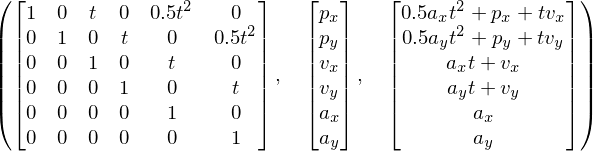

In [2]:
t = symbols('t')
p_x, v_x, a_x = symbols('p_x v_x a_x')
p_y, v_y, a_y = symbols('p_y v_y a_y')
x = Matrix([
        [p_x],
        [p_y],
        [v_x],
        [v_y],
        [a_x],
        [a_y]
           
    ])
A_t = Matrix([
        [1, 0, t, 0, 0.5*t**2, 0],
        [0, 1, 0, t, 0, 0.5*t**2],
        [0, 0, 1, 0, t, 0],
        [0, 0, 0, 1, 0, t],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1]
    ])
A_t, x, A_t*x

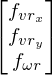

In [3]:
f_vr_x, f_vr_y, f_omegar = symbols("f_{vr_x}, f_{vr_y}, f_{\\omega\ r}")
# f_vr_x = 0
# f_vr_y = 0
# f_omegar = 1

u_t = Matrix([
    [f_vr_x],
    [f_vr_y],
    [f_omegar]
])
u_t

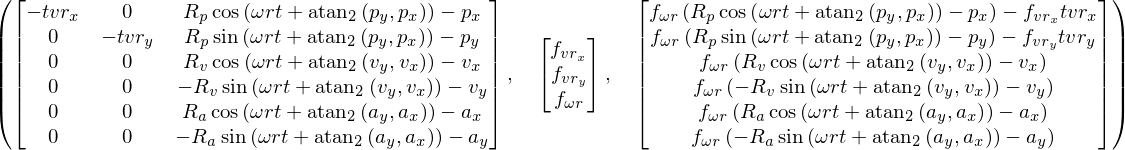

In [4]:
R_p, R_v, R_a = symbols("R_p R_v R_a")
vr_x, vr_y, omegar = symbols("vr_x, vr_y, \\omega\ r")
# vr_x = 0
# vr_y = 0
# R_p = (x[0]**2 + x[1]**2)**0.5
# R_v = (x[2]**2 + x[3]**2)**0.5
# R_a = (x[4]**2 + x[5]**2)**0.5
# omegar = rad(90)
B_t = Matrix([
    [-t*vr_x, 0, R_p*cos(atan2(x[1],x[0]) + t*omegar) - x[0]],
    [0, -t*vr_y, R_p*sin(atan2(x[1],x[0]) + t*omegar) - x[1]],
    [0, 0, R_v*cos(atan2(x[3],x[2]) + t*omegar) - x[2]],
    [0, 0, -R_v*sin(atan2(x[3],x[2]) + t*omegar) - x[3]],
    [0, 0, R_a*cos(atan2(x[5],x[4]) + t*omegar) - x[4]],
    [0, 0, -R_a*sin(atan2(x[5],x[4]) + t*omegar) - x[5]]
])
# x, (x+B_t*u_t).subs([[p_x, sqrt(2)], [p_y, sqrt(2)], [v_x, 2], [v_y, 0], [a_x, 2], [a_y, 0], [t, 1]]) # sqrt(2)
B_t, u_t, B_t*u_t

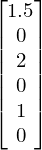

In [5]:
eq = A_t*x + B_t*u_t
eq = eq.subs([[f_vr_x, 0], [f_vr_y, 0], [f_omegar, 0]]) # Sem movimentos do robô
eq = eq.subs(t, 1) # delta de tempo 1s
eq = eq.subs([[p_x, 0], [p_y, 0]]) # Posição incial objeto 0, 0
eq = eq.subs([[v_x, 1], [v_y, 0]]) # velocidade incial objeto 1, 1
eq = eq.subs([[a_x, 1], [a_y, 0]]) # velocidade incial objeto 1, 1
eq

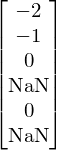

In [6]:
eq = A_t*x + B_t*u_t
eq = eq.subs([[f_vr_x, 1], [f_vr_y, 1], [f_omegar, 1]]) # Com movimentos do robô
eq = eq.subs([[vr_x, 0], [vr_y, 1], [omegar, rad(180)]]) # Velocidade robô
eq = eq.subs(t, 1) # delta de tempo 1s
eq = eq.subs(R_p, (p_x**2 + p_y**2)**0.5) # Calculando R
eq = eq.subs([[p_x, 2], [p_y, 0]]) # Posição incial objeto 2, 0
eq = eq.subs([[v_x, 0], [v_y, 0]]) # velocidade incial objeto 0, 0
eq = eq.subs([[a_x, 0], [a_y, 0]]) # velocidade incial objeto 0, 0
eq

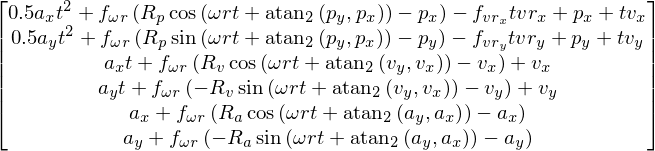

In [7]:
eq = A_t*x + B_t*u_t
eq

## Atualização

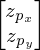

In [8]:
z_p_x, z_p_y = symbols('z_{p_{x}} z_{p_{y}}')
z = Matrix([
        [z_p_x],
        [z_p_y]
    ])
z

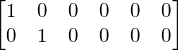

In [9]:
C_t = Matrix([
        [1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0]
    ])
C_t

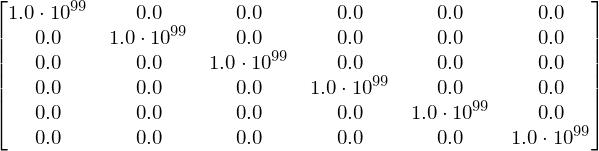

In [10]:
import numpy as np
Sigma = symbols('\\Sigma_t')
Sigma = Matrix(np.identity(6) * 1.0/1e-99)
Sigma